<a href="https://colab.research.google.com/github/tylerschuessler/math_data_science_course_test/blob/main/guest_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# --------------------
# Imports
# --------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_olivetti_faces, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score

In [8]:
# --------------------
# Load Datasets
# --------------------
iris = load_iris()
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
diabetes = load_diabetes()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [9]:
# --------------------
# Data Exploration
# --------------------

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

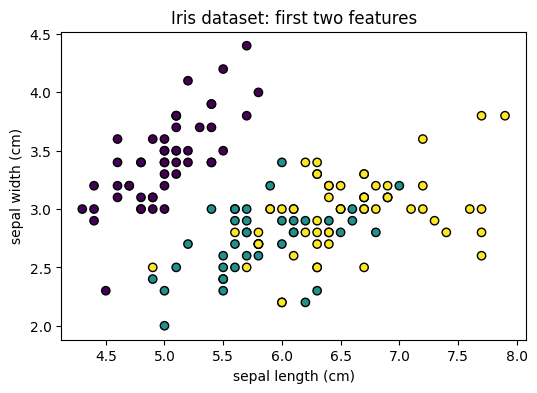

In [13]:
#plot first two features of iris dataset
plt.figure(figsize=(6, 4))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis', edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris dataset: first two features")
plt.show()

In [14]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [15]:
faces.data.shape

(400, 4096)

In [16]:
faces.images.shape

(400, 64, 64)

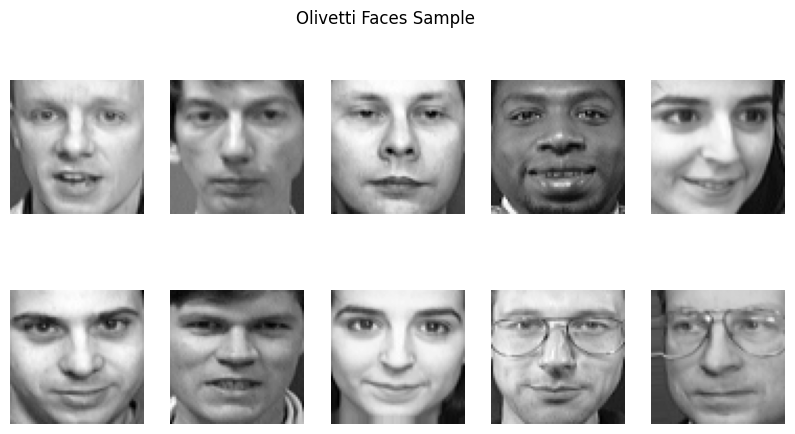

In [17]:
# Show a few Olivetti faces
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Olivetti Faces Sample")
plt.show()

In [18]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

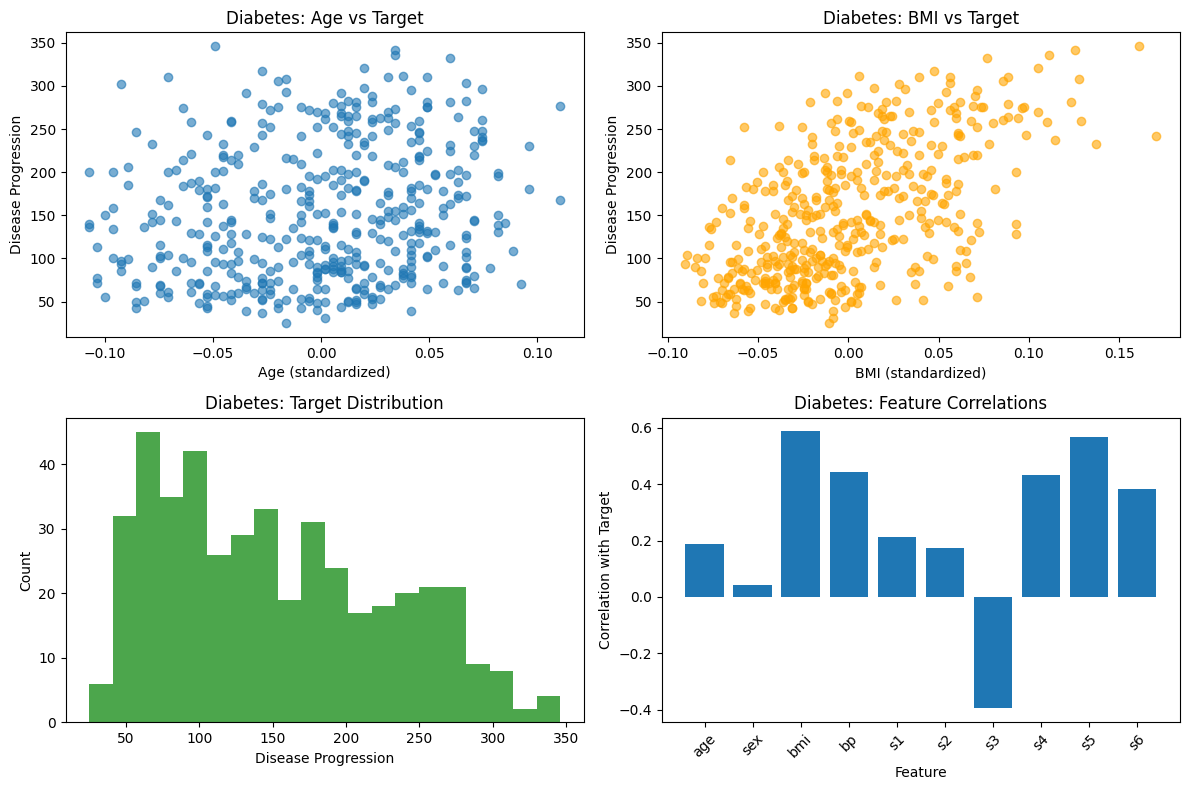

In [19]:
# Diabetes exploratory plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


# Age vs target
axes[0, 0].scatter(diabetes.data[:, 0], diabetes.target, alpha=0.6)
axes[0, 0].set_xlabel("Age (standardized)")
axes[0, 0].set_ylabel("Disease Progression")
axes[0, 0].set_title("Diabetes: Age vs Target")


# BMI vs target
axes[0, 1].scatter(diabetes.data[:, 2], diabetes.target, alpha=0.6, color="orange")
axes[0, 1].set_xlabel("BMI (standardized)")
axes[0, 1].set_ylabel("Disease Progression")
axes[0, 1].set_title("Diabetes: BMI vs Target")


# Histogram of target
axes[1, 0].hist(diabetes.target, bins=20, color="green", alpha=0.7)
axes[1, 0].set_xlabel("Disease Progression")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Diabetes: Target Distribution")


# Pair plot substitute: feature correlation with target
correlations = [np.corrcoef(diabetes.data[:, i], diabetes.target)[0, 1] for i in range(diabetes.data.shape[1])]
axes[1, 1].bar(range(len(correlations)), correlations)
axes[1, 1].set_xlabel("Feature")
axes[1, 1].set_ylabel("Correlation with Target")
axes[1, 1].set_title("Diabetes: Feature Correlations")


# Set xticks with feature indices as labels
axes[1, 1].set_xticks(range(len(correlations)))
axes[1, 1].set_xticklabels([f"{diabetes.feature_names[i]}" for i in range(len(correlations))], rotation=45)


plt.tight_layout()
plt.show()

In [20]:
# --------------------
# Regression Example (Diabetes dataset)
# --------------------
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Regression (Diabetes) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Regression (Diabetes) RMSE: 53.85344583676593


In [21]:
#use an MLP regressor
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(max_iter=20000, tol=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Regression (Diabetes) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), MLPRegressor(max_iter=20000, tol=0.1))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Regression (Diabetes) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Regression (Diabetes) RMSE: 54.08897751873908
Regression (Diabetes) RMSE: 56.739864312964606


In [22]:
#use a tree regressor
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Regression (Diabetes) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Regression (Diabetes) RMSE: 72.2901457222167


In [23]:
# --------------------
# Classification Example (Iris dataset)
# --------------------
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target
)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification (Iris) Accuracy:", accuracy_score(y_test, y_pred))


Classification (Iris) Accuracy: 0.9333333333333333


In [24]:
#use an SVM classifier
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification (Iris) Accuracy:", accuracy_score(y_test, y_pred))



Classification (Iris) Accuracy: 0.8666666666666667


In [25]:
# import ipywidgets as widgets
# from ipywidgets import interact

# # --------------------
# # 5. Dimensionality Reduction (PCA on Faces with interactive reconstruction)
# # --------------------
# def show_pca_reconstruction(n_components=50):
#   pca = PCA(n_components=n_components)
#   faces_reduced = pca.fit_transform(faces.data)
#   faces_reconstructed = pca.inverse_transform(faces_reduced)



#   # Plot PCA scatter (first two PCs) and explained variance
#   fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#   # Scatter of first two PCs
#   axes[0].scatter(faces_reduced[:, 0], faces_reduced[:, 1], c=faces.target, cmap='tab20', s=10)
#   axes[0].set_title(f"PCA Scatter (n_components={n_components})")
#   axes[0].set_xlabel("PC1")
#   axes[0].set_ylabel("PC2")


#   # Explained variance ratio plot
#   axes[1].plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
#   axes[1].axvline(n_components, color='r', linestyle='--')
#   axes[1].set_title("Cumulative Explained Variance")
#   axes[1].set_xlabel("Number of Components")
#   axes[1].set_ylabel("Cumulative Variance Explained")


#   plt.tight_layout()
#   plt.show()


#   # Show original vs reconstructed faces
#   n_faces = 5
#   fig, axes = plt.subplots(2, n_faces, figsize=(10, 4))
#   for i in range(n_faces):
#     # Original
#     axes[0, i].imshow(faces.images[i], cmap='gray')
#     axes[0, i].axis('off')
#     # Reconstructed
#     axes[1, i].imshow(faces_reconstructed[i].reshape(64, 64), cmap='gray')
#     axes[1, i].axis('off')


#   plt.suptitle(f"Original (top) vs PCA Reconstructed (bottom) with {n_components} components")
#   plt.show()


# # Interactive widget to adjust PCA components
# interact(show_pca_reconstruction, n_components=widgets.IntSlider(min=2, max=102, step=20, value=50))

In [26]:
from sklearn.cluster import KMeans



In [27]:
# from matplotlib import cm

# # --------------------
# # 6. KMeans Clustering with Visualization
# # --------------------
# def cluster_faces_compare(n_clusters=10, n_components=50):
#     # --- Raw pixel clustering ---
#     kmeans_raw = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
#     labels_raw = kmeans_raw.fit_predict(faces.data)

#     # --- PCA reduction + clustering ---
#     pca = PCA(n_components=n_components, random_state=42)
#     faces_reduced = pca.fit_transform(faces.data)

#     kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
#     labels_pca = kmeans_pca.fit_predict(faces_reduced)

#     # --- Define cluster colors ---
#     cmap = cm.get_cmap("tab20", n_clusters)
#     cluster_colors = [cmap(i) for i in range(n_clusters)]

#     # --- PCA scatter with cluster colors ---
#     plt.figure(figsize=(8, 6))
#     for i in range(n_clusters):
#         mask = labels_pca == i
#         plt.scatter(faces_reduced[mask, 0], faces_reduced[mask, 1],
#                     color=cluster_colors[i], s=10, label=f"Cluster {i}")
#     plt.title(f"KMeans on PCA-Reduced Faces (k={n_clusters}, PCA={n_components})")
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
#     plt.tight_layout()
#     plt.show()

#     # --- Cluster centers (as faces) ---
#     fig, axes = plt.subplots(1, n_clusters, figsize=(1.5 * n_clusters, 2))
#     for i, ax in enumerate(axes):
#         center_img = kmeans_pca.cluster_centers_[i].dot(pca.components_) + pca.mean_
#         ax.imshow(center_img.reshape(64, 64), cmap='gray')
#         ax.set_title(f"C{i}", fontsize=8)
#         ax.axis("off")
#     plt.suptitle("Cluster Centers (PCA Clustering)", y=1.05)
#     plt.tight_layout()
#     plt.show()

#     # --- Example faces (raw clustering) ---
#     fig, axes = plt.subplots(n_clusters, 8, figsize=(8, 1.2 * n_clusters))
#     for cluster in range(n_clusters):
#         cluster_indices = np.where(labels_raw == cluster)[0][:8]
#         for j, idx in enumerate(cluster_indices):
#             axes[cluster, j].imshow(faces.images[idx], cmap='gray')
#             axes[cluster, j].imshow(np.full((64, 64), 255), cmap="gray", alpha=0.0)  # just background
#             axes[cluster, j].set_facecolor(cluster_colors[cluster])  # border color
#             axes[cluster, j].axis('off')
#         for j in range(len(cluster_indices), 8):
#             axes[cluster, j].axis('off')
#         axes[cluster, 0].set_ylabel(f"C{cluster}", rotation=0, labelpad=20)
#     plt.suptitle("Example Faces from Each KMeans Cluster (Raw Pixels)")
#     plt.tight_layout()
#     plt.show()

#     # --- Example faces (PCA clustering) ---
#     fig, axes = plt.subplots(n_clusters, 8, figsize=(8, 1.2 * n_clusters))
#     for cluster in range(n_clusters):
#         cluster_indices = np.where(labels_pca == cluster)[0][:8]
#         for j, idx in enumerate(cluster_indices):
#             axes[cluster, j].imshow(faces.images[idx], cmap='gray')
#             axes[cluster, j].set_facecolor(cluster_colors[cluster])  # border color
#             axes[cluster, j].axis('off')
#         for j in range(len(cluster_indices), 8):
#             axes[cluster, j].axis('off')
#         axes[cluster, 0].set_ylabel(f"C{cluster}", rotation=0, labelpad=20)
#     plt.suptitle("Example Faces from Each KMeans Cluster (PCA Reduced)")
#     plt.tight_layout()
#     plt.show()

# # Interactive widget for clustering
# interact(cluster_faces_compare,
#          n_clusters=widgets.IntSlider(min=2, max=15, step=1, value=6),
#          n_components=widgets.IntSlider(min=5, max=200, step=5, value=50))
